In [ ]:
!pip install gradio --quiet
!pip install -q gradio opencv-python-headless tensorflow


In [ ]:
import os
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = "/content/drive/MyDrive/Physics /real_and_fake_face"
structured_path = "/content/drive/MyDrive/Physics /structured_dataset"

os.makedirs(os.path.join(structured_path, "train", "real"), exist_ok=True)
os.makedirs(os.path.join(structured_path, "train", "fake"), exist_ok=True)


In [ ]:
for label in ["real", "fake"]:
    src_folder = os.path.join(base_path, f"training_{label}")
    dst_folder = os.path.join(structured_path, "train", label)
    for file in os.listdir(src_folder):
        if file.endswith(".jpg"):
            shutil.copy(os.path.join(src_folder, file), dst_folder)

In [ ]:
img_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True
)

train = img_gen.flow_from_directory(
    os.path.join(structured_path, "train"),
    target_size=(96, 96),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val = img_gen.flow_from_directory(
    os.path.join(structured_path, "train"),
    target_size=(96, 96),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def scheduler(epoch):
    if epoch <= 1:
        return 1.0
    elif epoch <= 10:
        return 0.1
    elif epoch <= 15:
        return 0.01
    else:
        return 0.001

lr_callback = LearningRateScheduler(scheduler)


In [ ]:
!pip install -q tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
import os

# Define the paths
val_path = "/content/drive/MyDrive/Physics /structured_dataset/train"

# Fix capitalization issues
os.rename(os.path.join(val_path, "FAKE"), os.path.join(val_path, "fake")) if "FAKE" in os.listdir(val_path) else None
os.rename(os.path.join(val_path, "REAL"), os.path.join(val_path, "real")) if "REAL" in os.listdir(val_path) else None


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/Physics /real_and_fake_face"
val_dir = "/content/drive/MyDrive/Physics /structured_dataset/train"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # Important for binary classification
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)


Found 2041 files belonging to 2 classes.
Found 2041 files belonging to 2 classes.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[lr_callback]
)




In [ ]:
!pip install tensorflow


In [ ]:
model.save("/content/drive/MyDrive/deepfake_detectory.keras")


In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
!pip install -q gradio


In [ ]:
model.save("deepfake_detection_model.keras")



In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/drive/MyDrive/deepfake_detectory.keras")


In [ ]:
import numpy as np
from PIL import Image

def predict_image(image):
    # Resize and normalize
    image = image.resize((224, 224))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Prediction
    prediction = model.predict(image_array)[0][0]

    # Format result
    label = "FAKE" if prediction > 0.5 else "REAL"
    confidence = round(float(prediction if prediction > 0.5 else 1 - prediction) * 100, 2)

    return f"{label} ({confidence}% confidence)"


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

mobilenet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
mobilenet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# 📦 Step 1: Install required packages
!pip install -q gradio opencv-python-headless

# 📥 Step 2: Import libraries
import tensorflow as tf
import numpy as np
import cv2
import gradio as gr

# 🧠 Step 3: Load the trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/deepfake_detectory.keras")  # ✅ Use your model path

# 🔍 Step 4: Define the prediction function
def classify_image(img):
    # Resize image to match model's input size (update if you used 224x224 during training)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 224, 224, 3)

    # Get prediction
    pred = model.predict(img)[0][0]

    # Interpret the result
    label = "Real" if pred < 0.5 else "Fake"  # ✅ 0 = Real, 1 = Fake
    confidence = f"{(1 - pred if label == 'Real' else pred) * 100:.2f}%"

    return f"Prediction: {label}\nConfidence: {confidence}"

# 🎛️ Step 5: Launch Gradio Interface
gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="numpy", label="Upload a Face Image"),
    outputs="text",
    title="🧠 Deepfake Face Detection",
    description="Upload a face image to determine if it's REAL or FAKE (AI-generated)."
).launch()


# Pretrained EfficientNetV2B0 Model


In [ ]:
#Training The Mobilenet Using Pretrained EfficientNetV2B0 Model



import tensorflow as tf

mobilenet_model = tf.keras.models.load_model("/content/deepfake_detection_model.keras")
mobilenet_model.trainable = False  # Ensure it's frozen

# ✅ Optional: Check model structure
mobilenet_model.summary()






In [ ]:
#Build EfficientNetV2B0 Model


from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import layers, models

base_effnet = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_effnet.trainable = False

efficientnet_model = models.Sequential([
    base_effnet,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
#Compile EfficientNetV2B0 Model

# ✅ Compile EfficientNetV2B0
efficientnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ✅ Optional: Check EfficientNet structure
efficientnet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,920,593 (22.59 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
#Load Model & Define Image Classification Function


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetV2B0
def classify_image(img):
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = mobilenet_model.predict(img)[0][0]
    label = "Real" if pred < 0.5 else "Fake"
    confidence = f"{(1 - pred if label == 'Real' else pred) * 100:.2f}%"

    return f"Prediction: {label}\nConfidence: {confidence}"

mobilenet_model = tf.keras.models.load_model("/content/drive/MyDrive/deepfake_detectory.keras")
mobilenet_model.trainable = False  # Ensure it's frozen



In [ ]:
#Prepare EfficientNetV2B0 for Fine-Tuning

base_effnet = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_effnet.trainable = False

efficientnet_model = models.Sequential([
    base_effnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])
efficientnet_model.trainable = False  # No training
efficientnet_model = models.Sequential([
    base_effnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

# Ensure the top layers can be trained
efficientnet_model.trainable = True

In [ ]:
#Load and Preprocess Training & Validation Data



from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Physics /real_and_fake_face',  # Replace with your dataset path
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Physics /structured_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

In [ ]:
efficientnet_model.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

In [ ]:
#Train EfficientNetV2B0


base_effnet = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_effnet.trainable = False

efficientnet_model = models.Sequential([
    base_effnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])
efficientnet_model.trainable = False  # No training
efficientnet_model = models.Sequential([
    base_effnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

# Ensure the top layers can be trained
efficientnet_model.trainable = True

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Physics /real_and_fake_face',  # Replace with your dataset path
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Physics /structured_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
efficientnet_model.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

efficientnet_model.fit(train_generator,
                       validation_data=val_generator,
                       epochs=10)


In [ ]:
from tensorflow.keras.applications import EfficientNetV2B0

base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

efficient_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Compile
efficient_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:

efficient_model.save('/content/drive/MyDrive/mobilenetv2_model.h5')


# **Ensemble Model**

In [ ]:
from tensorflow.keras.layers import Concatenate, Input, Dense
from tensorflow.keras.models import Model

# Define common input
input_layer = Input(shape=(224, 224, 3))

# Get outputs from both models
mobilenet_output = mobilenet_model(input_layer)
efficientnet_output = efficientnet_model(input_layer)

# Concatenate both outputs
combined = Concatenate()([mobilenet_output, efficientnet_output])

# Final output layer (simple Dense layer on top of both)
output = Dense(1, activation='sigmoid')(combined)

# Define ensemble model
ensemble_model = Model(inputs=input_layer, outputs=output)
ensemble_model.summary()


In [ ]:
ensemble_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
loss, accuracy = ensemble_model.evaluate(val_ds)
print(f"Validation accuracy: {accuracy*100:.2f}%")

In [ ]:
import numpy as np
import cv2
from PIL import Image

def ensemble_predict(image):
    # If input is a PIL Image, convert to numpy array
    if isinstance(image, Image.Image):
        image = np.array(image)

    # Resize to model input size (224x224)
    img_resized = cv2.resize(image, (224, 224))

    # Normalize pixel values
    img_normalized = img_resized / 255.0

    # Add batch dimension
    img_batch = np.expand_dims(img_normalized, axis=0)

    # Predict with ensemble model
    pred = ensemble_model.predict(img_batch)[0][0]

    # Interpret prediction
    label = "Fake" if pred > 0.5 else "Real"
    confidence = (pred if pred > 0.5 else 1 - pred) * 100

    print( f"{label} ({confidence:.2f}% confidence)")


In [ ]:
"""import gradio as gr

gr.Interface(
    fn=ensemble_predict,
    inputs=gr.Image(type="numpy", label="Upload a face image"),
    outputs="text",
    title="Deepfake Detection Ensemble",
    description="Upload a face image and the model will predict if it is REAL or FAKE."
).launch()
"""

In [ ]:
loss, accuracy = ensemble_model.evaluate(val_ds)
print(f"Ensemble Validation Accuracy: {accuracy * 100:.2f}%")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Dense, Average
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load base models
mobilenet_model = load_model("/content/drive/MyDrive/deepfake_detectory.keras")
efficientnet_model = load_model("/content/drive/MyDrive/mobilenetv2_model.h5")

# Freeze base models
mobilenet_model.trainable = False
efficientnet_model.trainable = False

# Shared input
input_tensor = Input(shape=(224, 224, 3))

# Model outputs
mobilenet_output = mobilenet_model(input_tensor)
efficientnet_output = efficientnet_model(input_tensor)

# Average predictions using built-in layer
avg_output = Average()([mobilenet_output, efficientnet_output])

# (Optional) Dense layer, only if your models don’t already output 1 sigmoid unit
# If they already output sigmoid, just skip this line and set final_output = avg_output
final_output = Dense(1, activation='sigmoid')(avg_output)

# Build the ensemble model
ensemble_model = Model(inputs=input_tensor, outputs=final_output)
ensemble_model.summary()

# Save the ensemble model safely to Drive
ensemble_model.save("/content/drive/MyDrive/safe_ensemble_model.keras")


In [ ]:
!pip install -q gradio tensorflow opencv-python

import tensorflow as tf
import numpy as np
import cv2
import gradio as gr
import matplotlib.pyplot as plt


In [ ]:
# Load Ensemble model
ensemble_model = tf.keras.models.load_model("/content/drive/MyDrive/safe_ensemble_model.keras")

# Load individual base models for Grad-CAM (if needed)
mobilenet_model = tf.keras.models.load_model("/content/drive/MyDrive/deepfake_detectory.keras")


# **Ensemble-Based Deepfake Detection Web App using Gradio**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer
import numpy as np
import cv2
import gradio as gr

# Custom Average Layer
class AverageLayer(Layer):
    def call(self, inputs):
        return tf.reduce_mean(tf.stack(inputs, axis=0), axis=0)

# Load ensemble model (with custom layer)
ensemble_model = load_model(
    "/content/drive/MyDrive/safe_ensemble_model.keras",
    custom_objects={"AverageLayer": AverageLayer}
)


In [ ]:
def preprocess_image(img):
    img = cv2.resize(img, (224, 224))
    img = img.astype("float32") / 255.0
    return np.expand_dims(img, axis=0)


In [ ]:
def classify_image(image):
    processed = preprocess_image(image)
    prediction = ensemble_model.predict(processed)[0][0]
    label = "Real" if prediction < 0.5 else "Fake"
    confidence = f"{(1 - prediction) * 100:.2f}%" if label == "Real" else f"{prediction * 100:.2f}%"
    return f"{label} ({confidence})"


In [ ]:
gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="numpy", label="Upload Face Image"),
    outputs="text",
    title="🕵️ Deepfake Detector (Ensemble)",
    description="Upload a face image to check if it's Real or Fake using an ensemble of MobileNetV2 and EfficientNetV2."
).launch(debug=True)


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import datetime
import os

# Load your ensemble model
ensemble_model = tf.keras.models.load_model("/content/drive/MyDrive/safe_ensemble_model.keras")

# Setup logging
log_file = "prediction_logs.csv"
if not os.path.exists(log_file):
    pd.DataFrame(columns=["Timestamp", "Image_Name", "Prediction", "Confidence"]).to_csv(log_file, index=False)

# Prediction + Logging Function
def predict_and_log(image):
    # Preprocess image
    img_resized = cv2.resize(image, (224, 224))
    img_normalized = img_resized / 255.0
    img_batch = np.expand_dims(img_normalized, axis=0)

    # Predict
    pred = ensemble_model.predict(img_batch)[0][0]
    label = "Fake" if pred > 0.5 else "Real"
    confidence = float((pred if pred > 0.5 else 1 - pred) * 100)

    # Save to log
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    img_name = f"Image_{timestamp.replace(':', '_').replace(' ', '_')}.jpg"
    new_log = pd.DataFrame([[timestamp, img_name, label, confidence]],
                           columns=["Timestamp", "Image_Name", "Prediction", "Confidence"])
    new_log.to_csv(log_file, mode='a', header=False, index=False)

    return f"Prediction: {label}", f"Confidence: {confidence:.2f}%"

# Interface
interface = gr.Interface(
    fn=predict_and_log,
    inputs=gr.Image(type="numpy", label="🧪 Upload a Face Image"),
    outputs=[gr.Textbox(label="Prediction"), gr.Textbox(label="Confidence")],
    title="🧠 Deepfake Detection - Ensemble Model",
    description="Upload a face image to predict whether it's real or fake. Logs are saved for download.",
    allow_flagging="never",
    examples=[
        "/content/drive/MyDrive/Physics /structured_dataset/train/real/real_00001.jpg",
        "/content/drive/MyDrive/Physics /structured_dataset/train/fake/easy_100_1111.jpg"
    ]  # optional if you have sample test images
)

# Add Download Button
def download_logs():
    return log_file

download_interface = gr.Interface(fn=download_logs, inputs=[], outputs=gr.File(label="Download Prediction Logs"))

# Combine Interfaces
gr.TabbedInterface([interface, download_interface], ["🧪 Predict", "💾 Logs"]).launch()


# **Final Output With Grad-Cam Visualization**

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

def find_last_conv_layer(model):
    """
    Finds the name of the last Conv2D layer in a model.
    If model is Sequential, it extracts the base model first.
    """
    if isinstance(model, tf.keras.Sequential):
        model = model.layers[0]  # Unwrap Sequential

    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def get_gradcam_heatmap(model, image, last_conv_layer_name=None):
    """
    Computes Grad-CAM heatmap from a given model and input image.
    If last_conv_layer_name is not given, it finds it dynamically.
    """
    # Handle Sequential models
    base_model = model.layers[0] if isinstance(model, tf.keras.Sequential) else model

    # Auto-detect last conv layer if not provided
    if last_conv_layer_name is None:
        last_conv_layer_name = find_last_conv_layer(base_model)

    grad_model = tf.keras.models.Model(
        [base_model.inputs],
        [base_model.get_layer(last_conv_layer_name).output, base_model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()
    return cv2.resize(heatmap, (224, 224))



In [ ]:
print("MobileNetV2 last conv layer:", find_last_conv_layer(mobilenet_model))
print("EfficientNetV2 last conv layer:", find_last_conv_layer(efficientnet_model))


MobileNetV2 last conv layer: Conv_1
EfficientNetV2 last conv layer: top_conv


In [ ]:
dummy_img = np.ones((224, 224, 3), dtype=np.float32)
dummy_batch = np.expand_dims(dummy_img / 255.0, axis=0)

print("Ensemble model prediction:", ensemble_model.predict(dummy_batch))
print("MobileNet model prediction:", mobilenet_model.predict(dummy_batch))
print("EfficientNet model prediction:", efficientnet_model.predict(dummy_batch))


In [ ]:
# Dummy image to test
img = np.ones((224, 224, 3), dtype=np.float32)
img_batch = np.expand_dims(img / 255.0, axis=0)

# Test Grad-CAM
try:
    heatmap = get_gradcam_heatmap(mobilenet_model, img_batch)
    print("✅ Grad-CAM heatmap shape:", heatmap.shape)
except Exception as e:
    import traceback
    traceback.print_exc()


In [ ]:
def find_last_conv_layer(model):
    conv_layers = []

    def recurse(layer):
        # If layer is a Model or Sequential, recurse into its layers
        if hasattr(layer, 'layers'):
            for sublayer in layer.layers:
                recurse(sublayer)
        else:
            # Check if Conv2D layer
            if isinstance(layer, tf.keras.layers.Conv2D):
                conv_layers.append(layer)

    recurse(model)

    if not conv_layers:
        raise ValueError("No Conv2D layer found in the model.")

    # Return the name of the last Conv2D layer found
    return conv_layers[-1].name



In [ ]:
mobilenet_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,829 (8.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,259,265 (8.62 MB)

 Optimizer params: 2,564 (10.02 KB)

In [ ]:
# Find last conv layer inside base mobilenet model
last_conv_mobilenet = find_last_conv_layer(mobilenet_model.layers[0])
print("Last Conv2D layer:", last_conv_mobilenet)

# Use base model for Grad-CAM
heatmap1 = get_gradcam_heatmap(mobilenet_model.layers[0], img_batch, last_conv_mobilenet)


Last Conv2D layer inside MobileNetV2: Conv_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Prediction: 0.3573


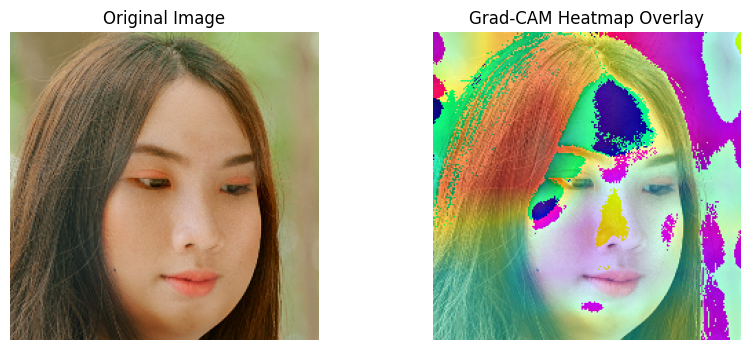

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Example: Your existing Sequential model
# mobilenet_model = tf.keras.models.load_model('your_model_path')  # or however you load it

# Step 1: Extract the internal MobileNetV2 Functional model
mobilenet_layer = mobilenet_model.get_layer('mobilenetv2_1.00_224')

# Step 2: Find the last Conv2D layer inside the MobileNetV2 functional model
def find_last_conv_layer_in_submodel(submodel):
    conv_layers = [layer for layer in submodel.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    if not conv_layers:
        raise ValueError("No Conv2D layer found in MobileNetV2 submodel.")
    return conv_layers[-1].name

last_conv_layer_name = find_last_conv_layer_in_submodel(mobilenet_layer)
print(f"Last Conv2D layer inside MobileNetV2: {last_conv_layer_name}")

# Step 3: Grad-CAM function adapted for the internal model
def get_gradcam_heatmap(model, image, last_conv_layer_name):
    # model: the internal MobileNetV2 functional model
    conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[conv_layer.output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, 0]  # assuming binary classification, single output neuron

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + tf.keras.backend.epsilon())
    heatmap = heatmap.numpy()
    heatmap = cv2.resize(heatmap, (image.shape[2], image.shape[1]))
    return heatmap

# Example preprocessing function to prepare your input image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (224, 224))
    img_array = np.array(img_resized) / 255.0
    img_batch = np.expand_dims(img_array, axis=0).astype(np.float32)
    return img_batch, img

# Your predict and visualize function
def predict_and_visualize(image_path):
    img_batch, original_img = preprocess_image(image_path)

    # Get prediction on the whole model (Sequential)
    preds = mobilenet_model.predict(img_batch)
    print(f"Prediction: {preds[0][0]:.4f}")

    # Generate Grad-CAM heatmap on internal MobileNetV2
    heatmap = get_gradcam_heatmap(mobilenet_layer, img_batch, last_conv_layer_name)

    # Overlay heatmap on original image
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
    superimposed_img = heatmap_color * 0.4 + cv2.resize(original_img, (224, 224))

    # Display images
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.axis('off')
    plt.imshow(cv2.resize(original_img, (224,224)))

    plt.subplot(1,2,2)
    plt.title("Grad-CAM Heatmap Overlay")
    plt.axis('off')
    plt.imshow(superimposed_img.astype(np.uint8))
    plt.show()

# Usage:
# Replace 'face_image.jpg' with your test image path
predict_and_visualize('/content/drive/MyDrive/Physics /structured_dataset/train/fake/easy_100_1111.jpg')


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2

# --- Load your model ---
mobilenet_model = tf.keras.models.load_model('/content/drive/MyDrive/deepfake_detectory.keras')

# Extract internal MobileNetV2 model
mobilenet_layer = mobilenet_model.get_layer('mobilenetv2_1.00_224')

# Find last Conv2D layer inside MobileNetV2
def find_last_conv_layer_in_submodel(submodel):
    conv_layers = [layer for layer in submodel.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    if not conv_layers:
        raise ValueError("No Conv2D layer found in MobileNetV2 submodel.")
    return conv_layers[-1].name

last_conv_layer_name = find_last_conv_layer_in_submodel(mobilenet_layer)
print(f"Last Conv2D layer inside MobileNetV2: {last_conv_layer_name}")

# Grad-CAM heatmap function
def get_gradcam_heatmap(model, image, last_conv_layer_name):
    conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[conv_layer.output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, 0]  # binary output assumed
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + tf.keras.backend.epsilon())
    heatmap = heatmap.numpy()
    heatmap = cv2.resize(heatmap, (image.shape[2], image.shape[1]))
    return heatmap

# Preprocess input image from Gradio PIL Image
def preprocess_image_gradio(img):
    img = np.array(img.convert('RGB'))
    img_resized = cv2.resize(img, (224, 224))
    img_array = img_resized / 255.0
    img_batch = np.expand_dims(img_array, axis=0).astype(np.float32)
    return img_batch, img_resized

# Gradio prediction + Grad-CAM
def gradio_predict(img):
    img_batch, original_img = preprocess_image_gradio(img)

    # Predict
    preds = mobilenet_model.predict(img_batch)
    confidence = preds[0][0]
    label = "Fake" if confidence > 0.5 else "Real"

    # Generate heatmap
    heatmap = get_gradcam_heatmap(mobilenet_layer, img_batch, last_conv_layer_name)
    heatmap_uint8 = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

    # Overlay heatmap on original image
    superimposed_img = cv2.addWeighted(heatmap_color, 0.4, original_img, 0.6, 0)

    return f"{label} ({confidence*100:.2f}%)", superimposed_img

# Setup Gradio interface
iface = gr.Interface(
    fn=gradio_predict,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Textbox(label="Prediction"), gr.Image(label="Grad-CAM Heatmap Overlay")],
    title="Fake/Real Face Detection with MobileNetV2 & Grad-CAM",
    description="Upload an image to get a prediction and Grad-CAM heatmap visualization."
)

iface.launch(share=True)
